# // LASSO REGRESSION MODEL //

#Importing necessary libraries for data preprocessing

In [1]:
import pandas as pd #For reading the dataset and to perform framing functions if needed
import numpy as np  #linear algebra function
import matplotlib.pyplot as plt #for visualizing the data
import seaborn as sns #for data distribution


#Importing the dataset I have used a simple 'WAVE' dataset to perform this regression

In [2]:
#---> Replace the path name for your path name
waves_data=pd.read_csv('C:/Users/ADMIN/Documents/Data science algorithms/waves.csv')

#Analysing the dataset

In [3]:
waves_data.head() #---> First 5 rows

,hh,WDIR,WSPD,GST,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,WVHT
0,1,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
3,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
4,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


In [4]:
waves_data.shape #---> Number of rows and columns

(3886, 12)

In [5]:
waves_data.isnull().sum() #Checking for null values present in each column

hh      0
WDIR    0
WSPD    0
GST     0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
WVHT    0
dtype: int64

In [6]:
waves_data.corr() #--> To find correlation between the columns 

,hh,WDIR,WSPD,GST,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,WVHT
hh,1.000000,0.009239,-0.041710,-0.046681,-0.007235,-0.011667,0.014815,-0.002354,0.001455,0.010371,-0.009992,-0.005297
WDIR,0.009239,1.000000,-0.080887,-0.070849,-0.052099,-0.055171,0.400040,-0.158441,-0.020251,-0.037577,-0.033285,-0.072296
WSPD,-0.041710,-0.080887,1.000000,0.986938,0.265773,0.342741,-0.074604,-0.102649,0.110911,0.129435,0.066140,0.676804
GST,-0.046681,-0.070849,0.986938,1.000000,0.282885,0.362590,-0.065117,-0.084490,0.105744,0.136223,0.050991,0.691531
DPD,-0.007235,-0.052099,0.265773,0.282885,1.000000,0.908203,-0.191378,0.090682,-0.163948,-0.037411,-0.232985,0.735568
APD,-0.011667,-0.055171,0.342741,0.362590,0.908203,1.000000,-0.200644,0.090726,-0.138025,-0.001819,-0.218562,0.854101
MWD,0.014815,0.400040,-0.074604,-0.065117,-0.191378,-0.200644,1.000000,-0.142733,-0.026456,-0.065393,-0.023773,-0.164750
PRES,-0.002354,-0.158441,-0.102649,-0.084490,0.090682,0.090726,-0.142733,1.000000,0.145336,0.286754,-0.015896,-0.000905
ATMP,0.001455,-0.020251,0.110911,0.105744,-0.163948,-0.138025,-0.026456,0.145336,1.000000,0.952580,0.939676,-0.071976
WTMP,0.010371,-0.037577,0.129435,0.136223,-0.037411,-0.001819,-0.065393,0.286754,0.952580,1.000000,0.850205,0.033039


In [7]:
x=waves_data.ATMP.values.reshape(-1,1)

In [8]:
y=waves_data.WTMP.values.reshape(-1,1)

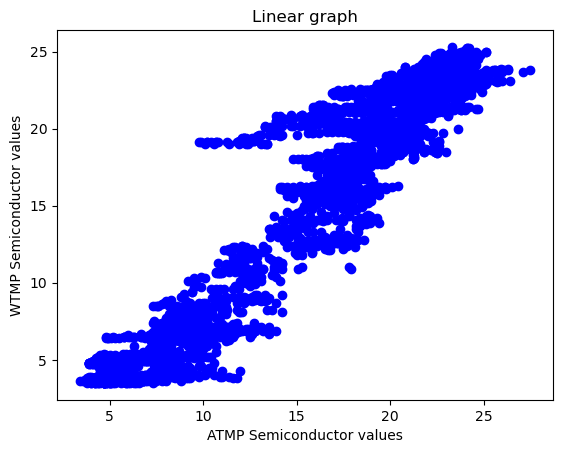

In [9]:
plt.scatter(x,y,color='blue')
plt.xlabel('ATMP Semiconductor values')
plt.ylabel('WTMP Semiconductor values')
plt.title('Linear graph')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Training the model

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
model=Lasso()

In [12]:
parametres={'alpha':[0.001,0.01,0.1,1,5,10,12,15,20]}

In [13]:
grid_model=GridSearchCV(model,parametres,scoring='neg_mean_squared_error',cv=5) #check those parametres in scikit documentation
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 12, 15, 20]},
             scoring='neg_mean_squared_error')

In [14]:
grid_model.best_params_  #To find which parametrs was suitable 

{'alpha': 0.01}

In [15]:
predictions=grid_model.predict(x_test)
predictions.flatten()

array([ 6.61499765, 22.17424232,  9.02558485, ...,  6.39585336,
       17.90092865, 18.9966501 ])

In [16]:
score=r2_score(y_test,predictions)
print(score*100)

91.1422043744725


Drawing the best fit line in the graph

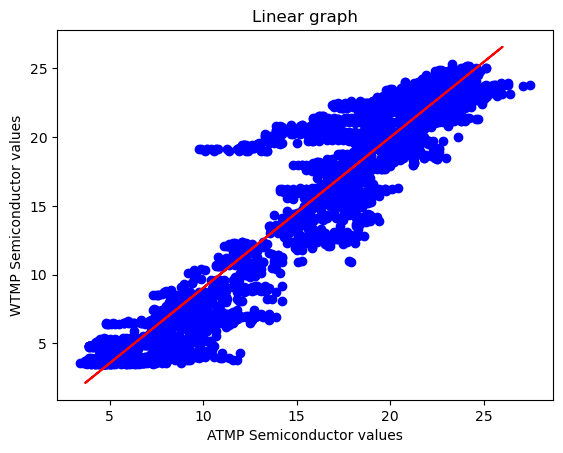

In [17]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,predictions,color='red')
plt.xlabel('ATMP Semiconductor values')
plt.ylabel('WTMP Semiconductor values')
plt.title('Linear graph')
plt.show()

This Lasso can be done to avoid underfitting 